# Regression Models

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.svm import SVR

# Load the dataset


In [316]:
df=pd.read_csv('Twitter.data', header=None)

In [317]:
df.shape

(583250, 78)

In [120]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5
5,1,0,0,1,2,3,0,1,0,0,...,1.0,0.0,1,0,0,1,2,3,0,1.0
6,1,0,0,0,2,0,2,1,0,0,...,0.0,1.0,1,0,0,0,2,0,2,0.0
7,0,2,0,0,0,1,1,0,2,0,...,1.0,1.0,0,2,0,0,0,1,1,2.0
8,2,0,0,0,1,1,2,2,0,0,...,1.0,1.0,2,0,0,0,1,1,2,1.0
9,0,1,1,2,2,0,3,0,1,1,...,0.0,1.0,0,1,1,2,2,0,3,0.5


In [121]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,173.237250,170.051550,197.622750,224.959150,248.618150,273.171650,274.713000,86.879000,85.566900,100.513650,...,1.119060,1.109775,173.732350,170.495350,198.069900,225.454350,249.149550,273.739400,275.302650,242.871450
std,691.092649,715.607698,831.374956,950.843267,1021.449857,1096.270575,1120.570496,300.986007,323.999477,385.110172,...,1.025415,0.994748,692.511774,716.699149,832.335439,951.941963,1022.612519,1097.519526,1121.883129,1058.885458
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,5.000000
50%,19.000000,18.000000,21.000000,24.000000,27.000000,32.000000,31.000000,12.000000,11.000000,13.000000,...,1.000000,1.000000,19.000000,18.000000,21.000000,24.000000,27.000000,32.000000,31.000000,25.000000
75%,118.000000,112.000000,129.000000,148.000000,167.000000,186.000000,182.000000,65.000000,62.000000,70.000000,...,1.078267,1.077644,118.000000,112.000000,130.000000,149.000000,167.000000,187.000000,182.000000,157.500000
max,24210.000000,29574.000000,31211.000000,31431.000000,31431.000000,31431.000000,31431.000000,10036.000000,14059.000000,15097.000000,...,58.000000,58.000000,24301.000000,29574.000000,31211.000000,31432.000000,31432.000000,31432.000000,31432.000000,31321.500000


In [318]:
df.columns=['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6','Annotation']

In [460]:
X1=df[['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6']]
y1=df['Annotation']

creating randomly sampled training and test data sets.

In [461]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X1, y1, shuffle = True, test_size = 0.005)

In [462]:
X=sample_data
y=sample_target

In [463]:
X.shape

(2917, 77)

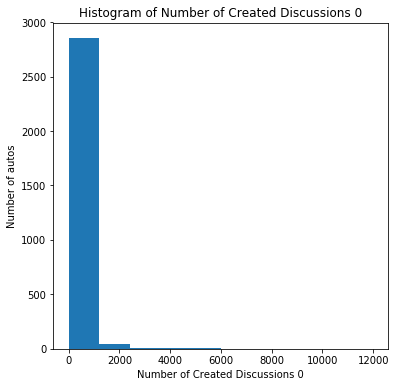

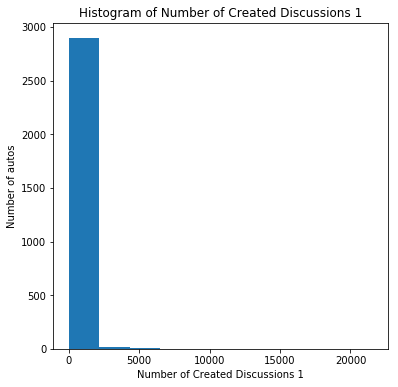

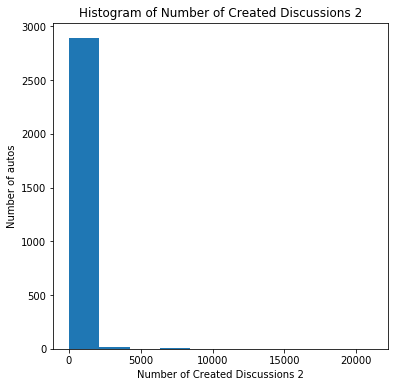

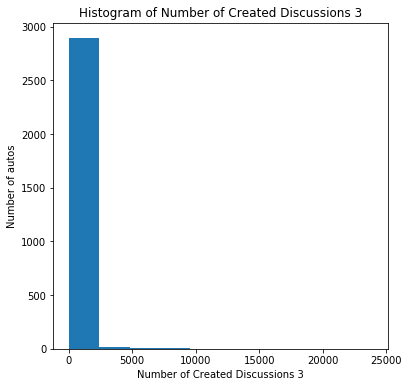

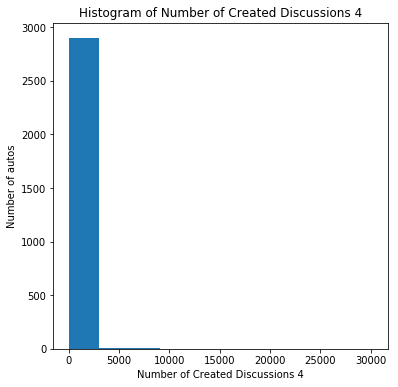

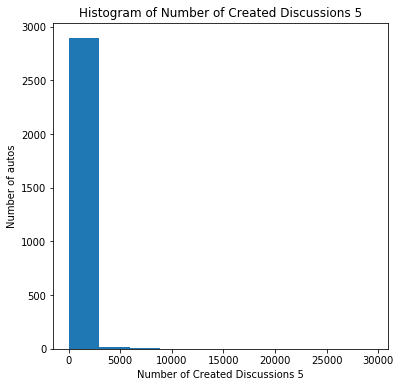

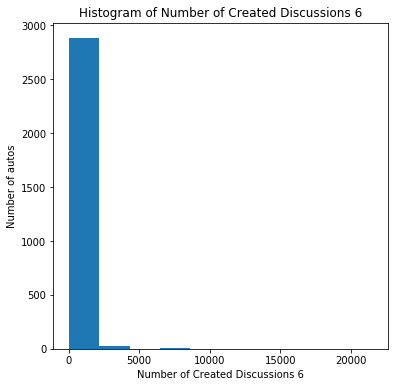

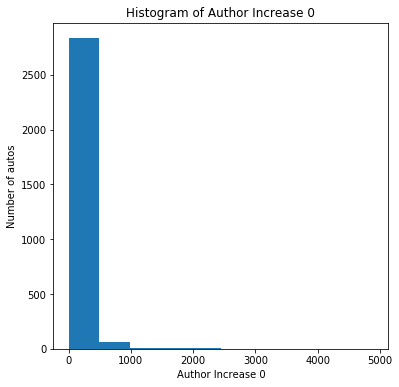

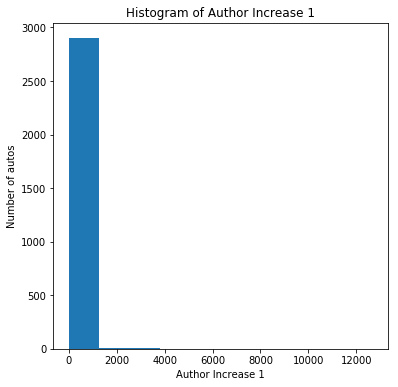

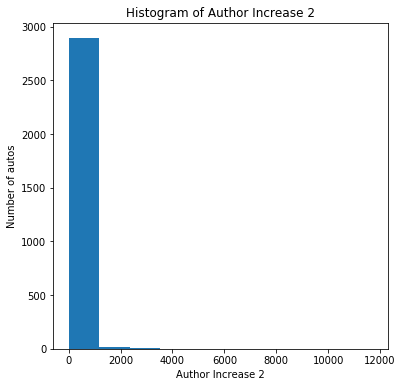

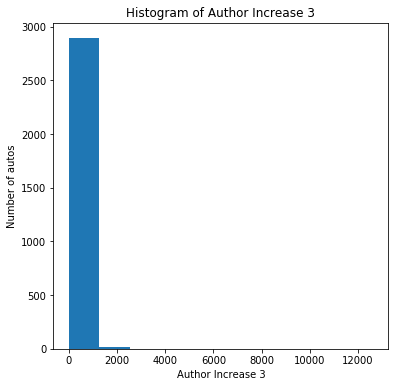

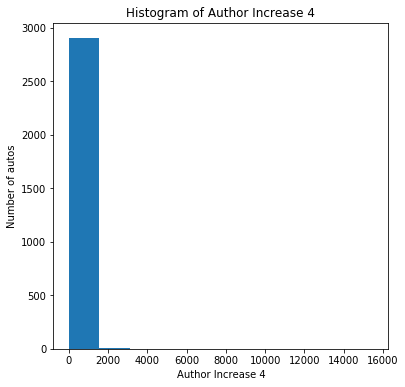

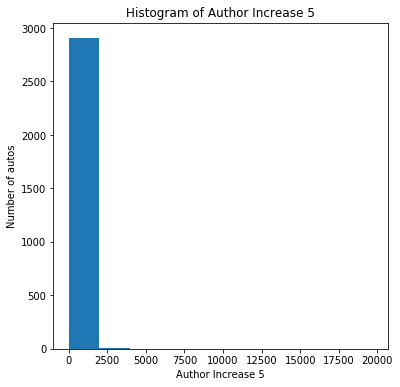

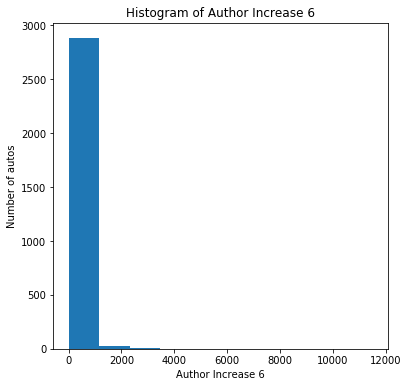

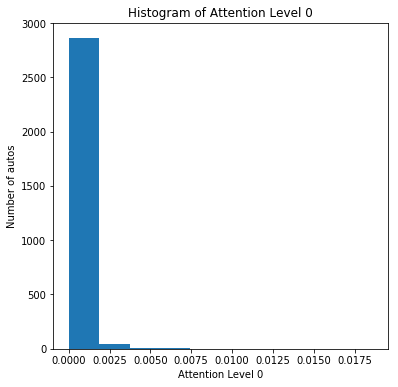

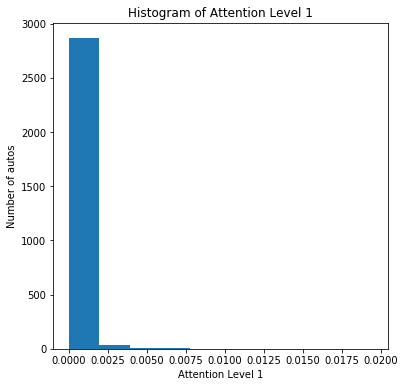

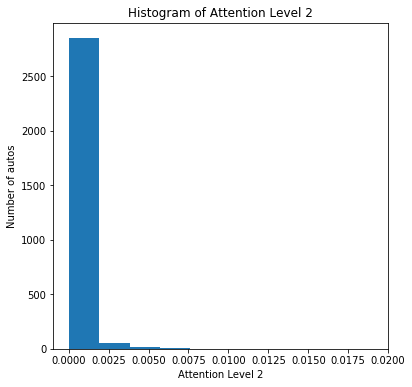

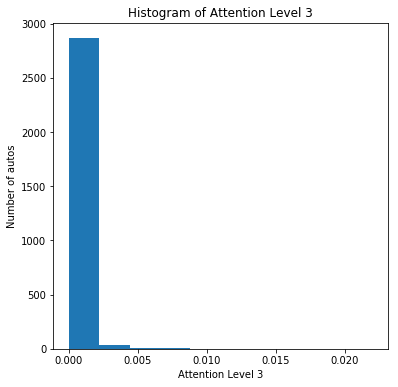

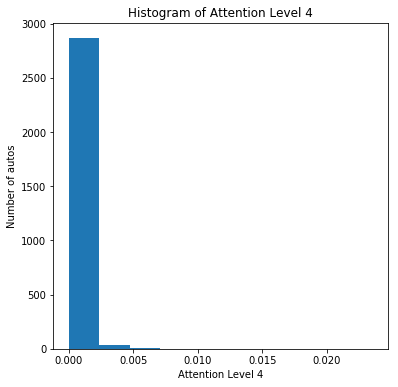

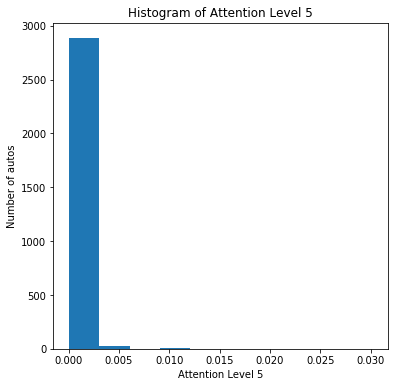

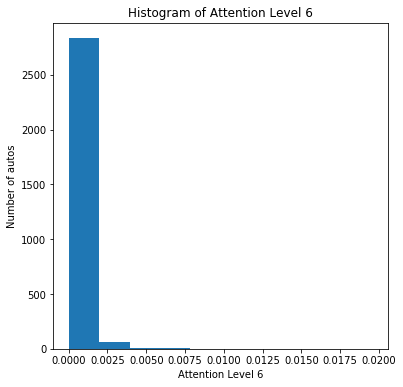

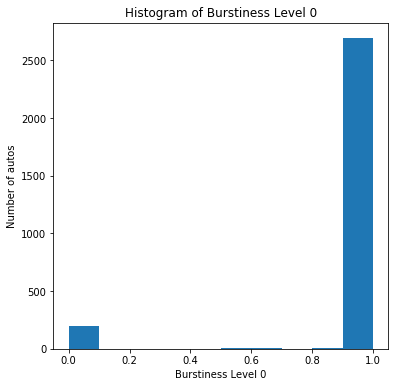

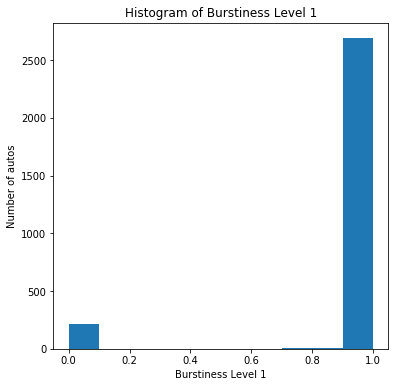

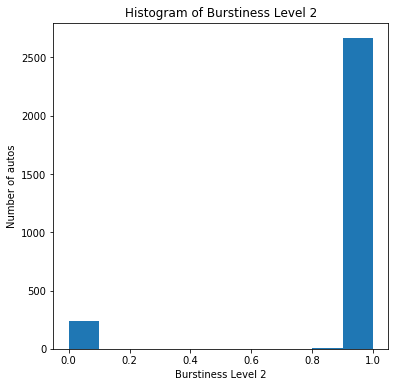

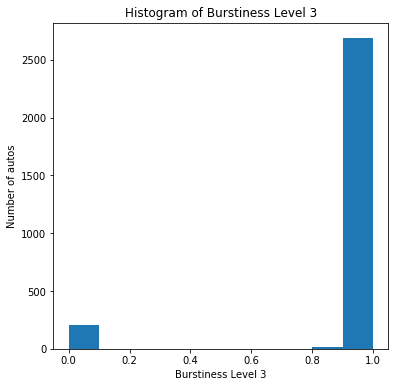

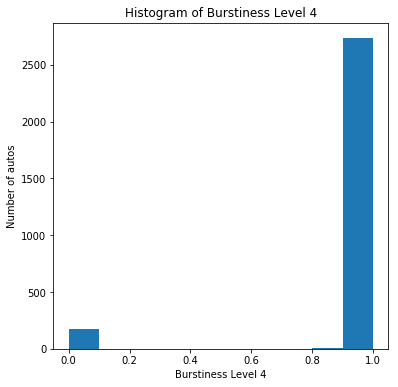

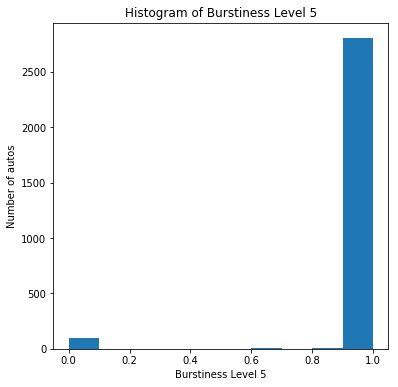

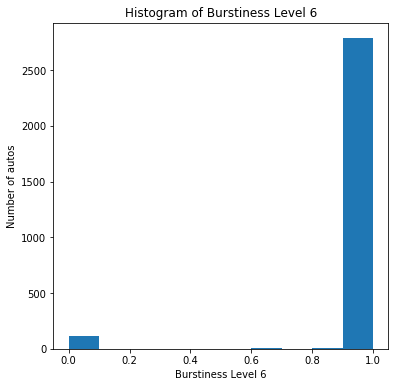

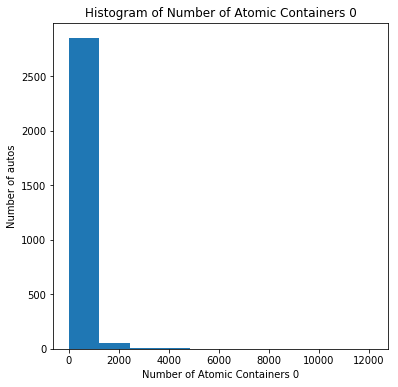

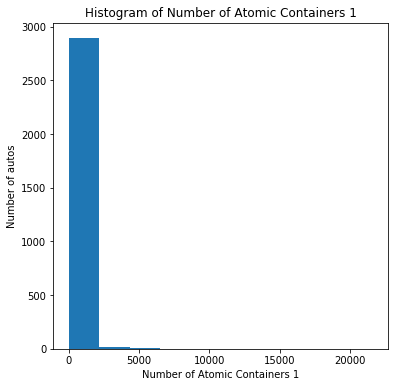

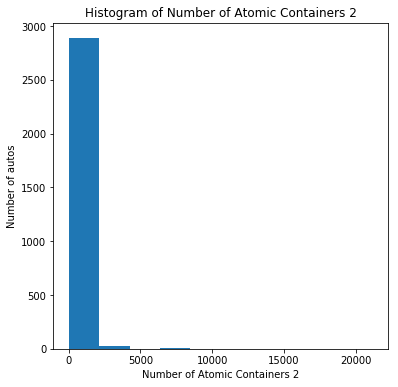

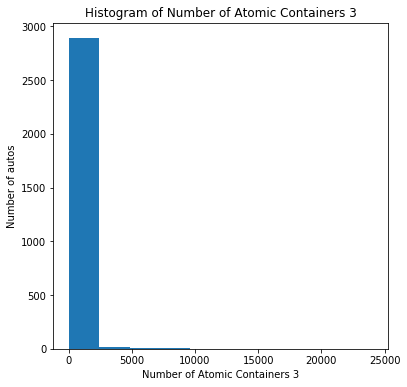

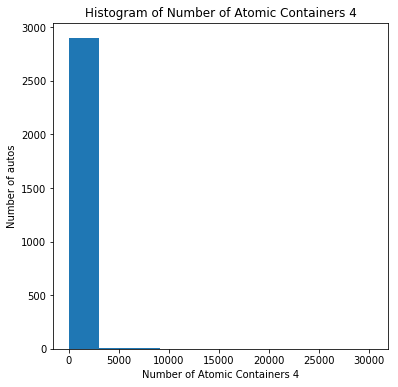

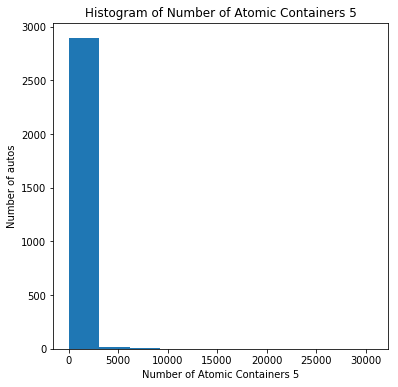

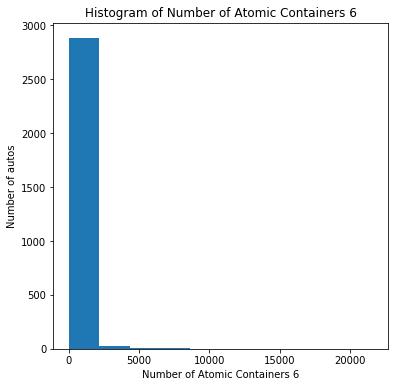

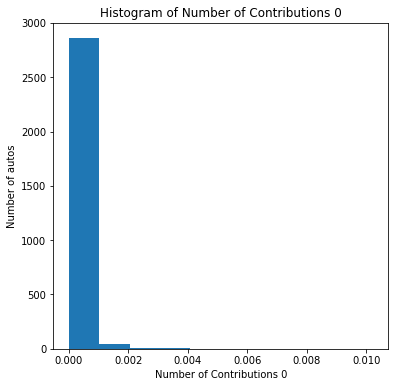

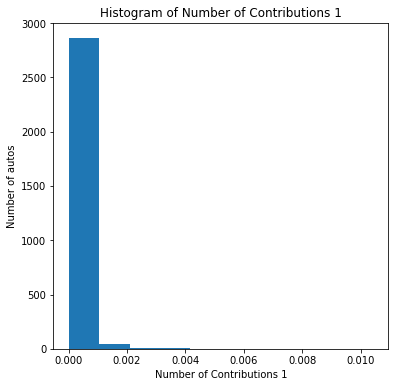

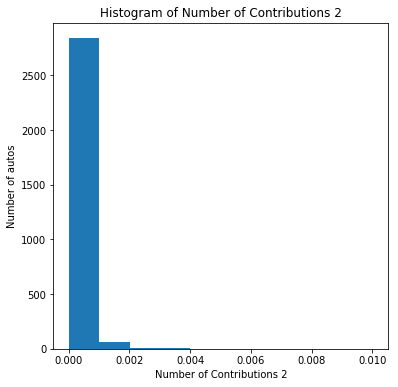

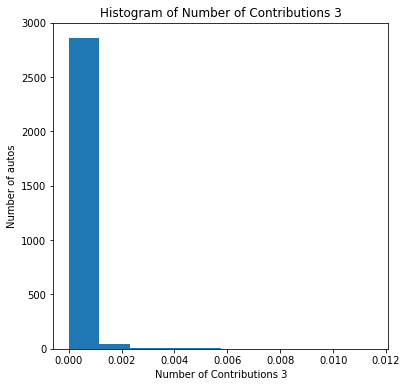

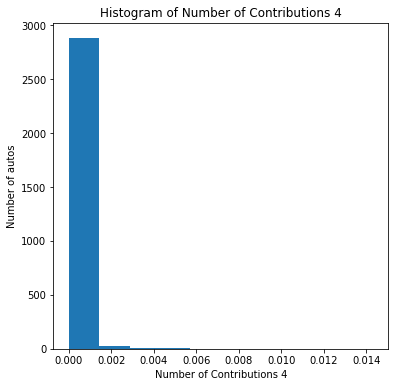

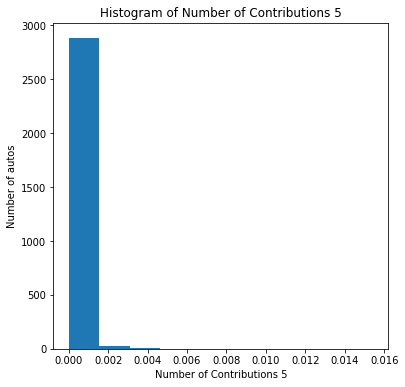

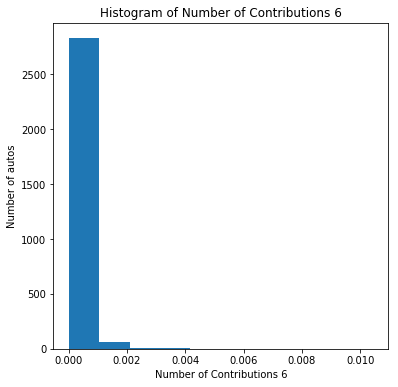

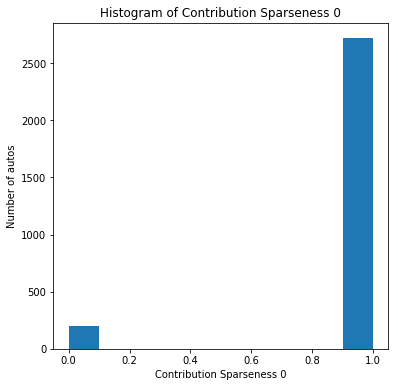

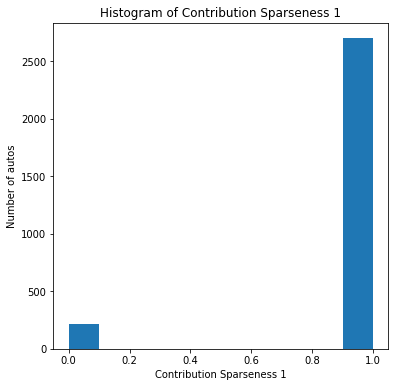

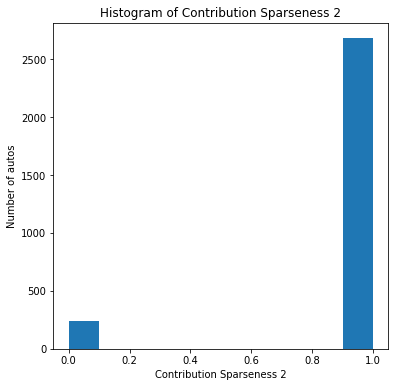

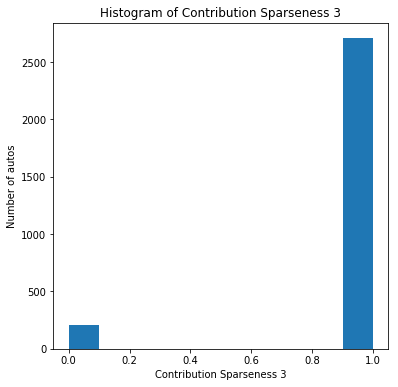

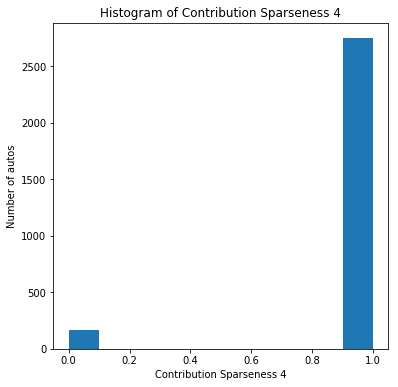

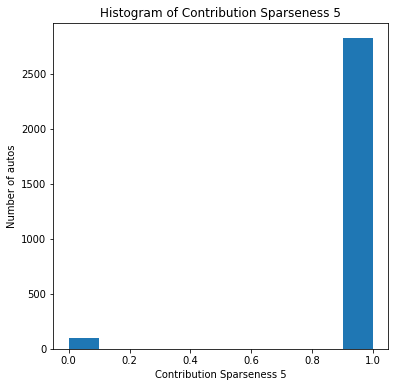

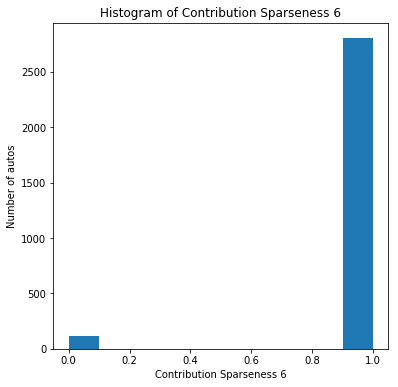

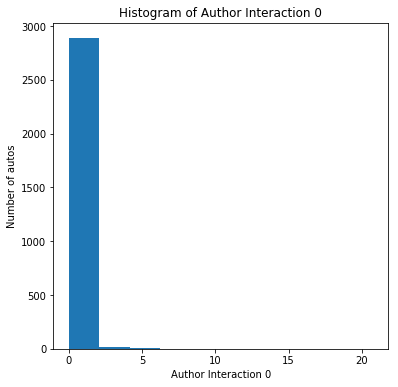

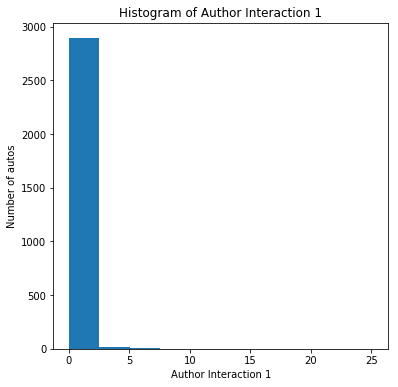

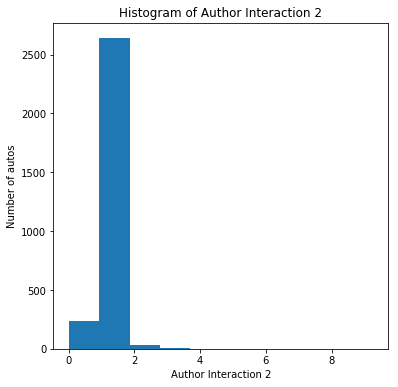

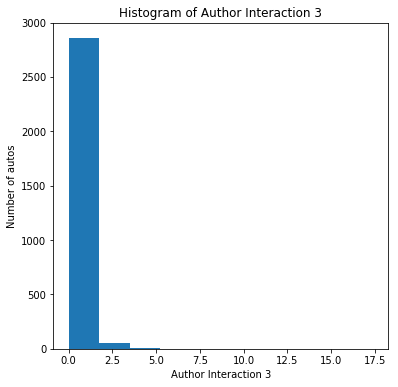

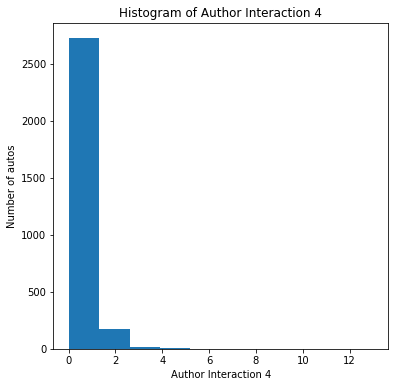

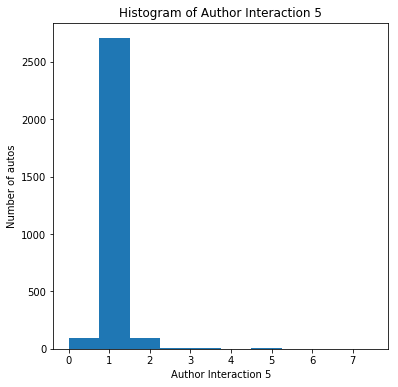

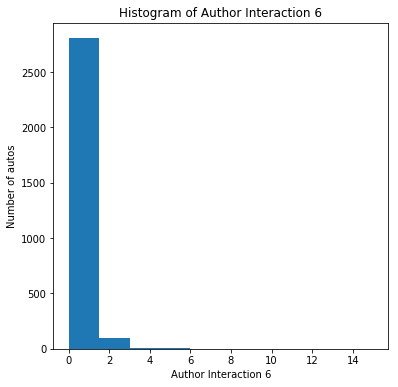

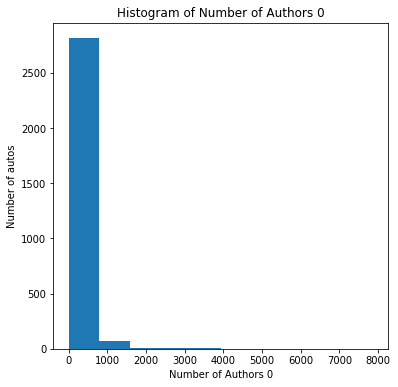

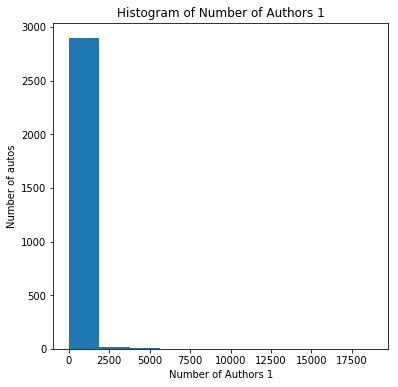

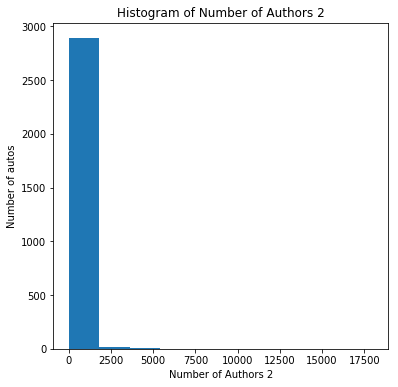

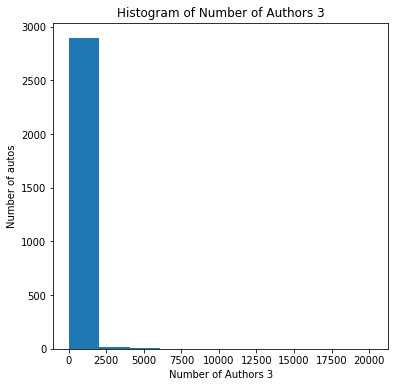

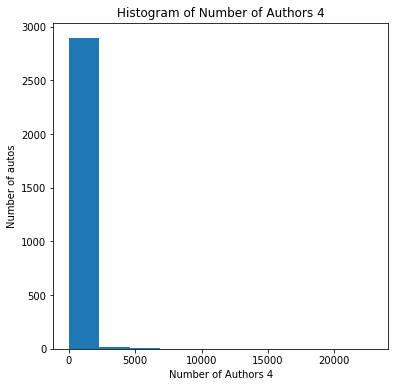

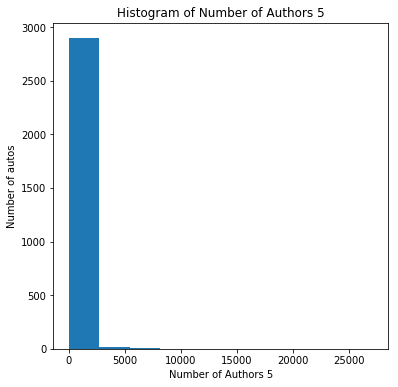

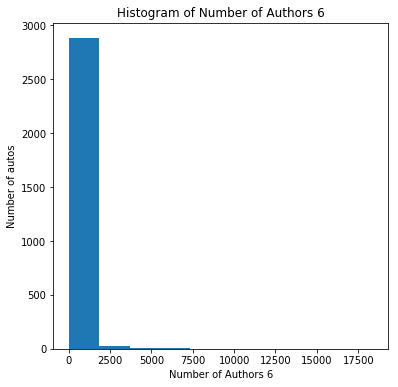

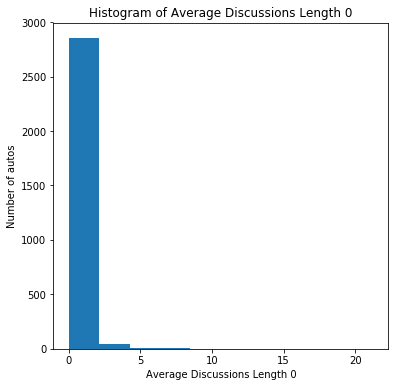

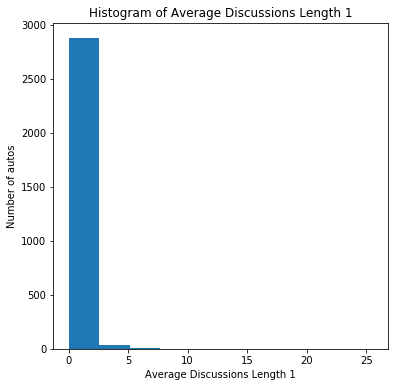

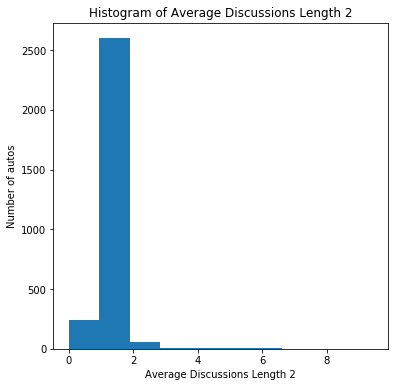

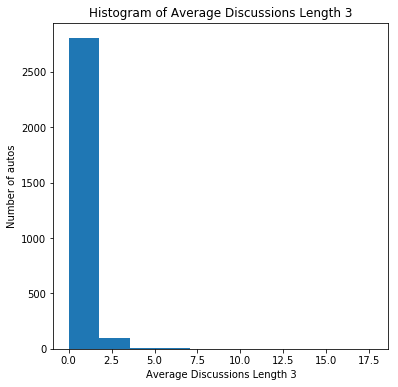

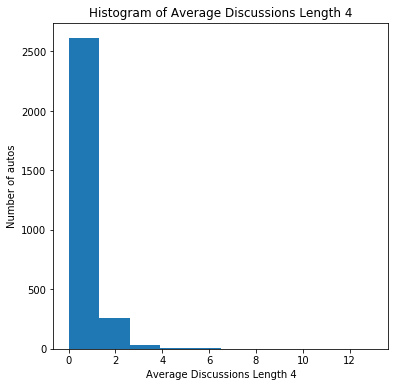

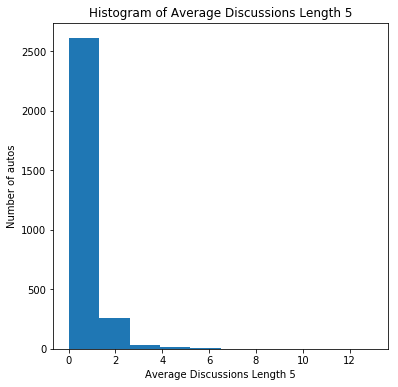

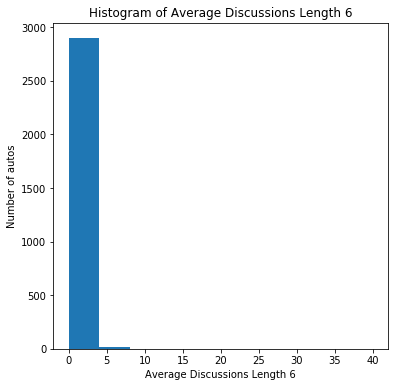

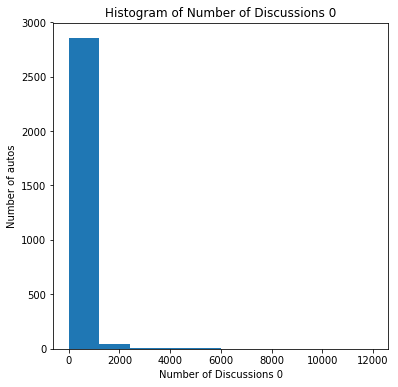

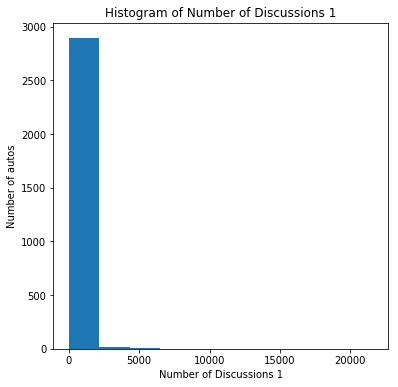

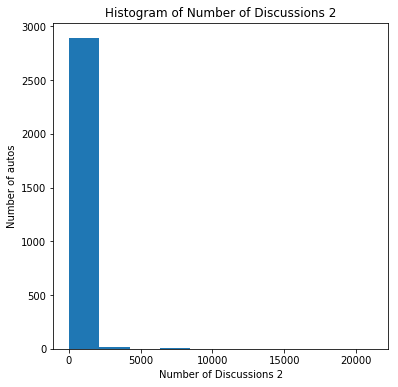

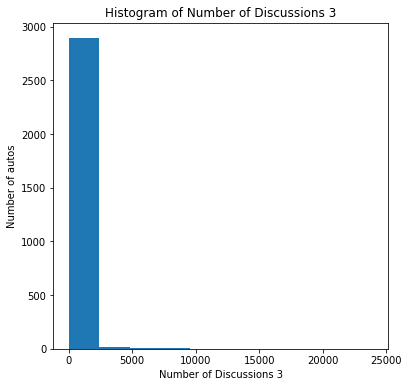

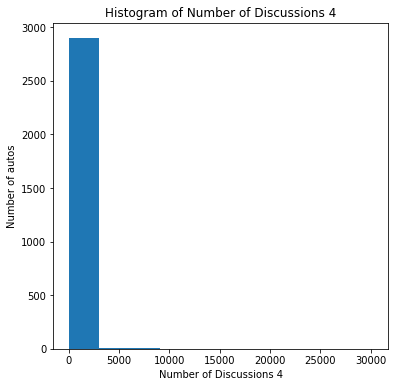

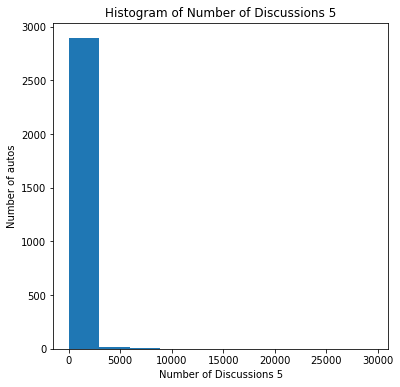

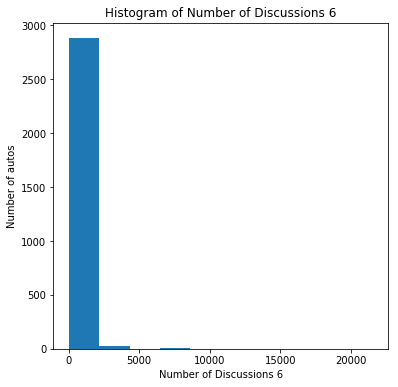

In [464]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
           
plot_histogram(X, X.columns)

#### Justification of type of scaling used
In the next step we have to rescale data. Rescaling prevents features from having an undue influence on model training simply because then have a larger range of numeric variables. We used MinMax scaler function from the Scikit Learn preprocessing package. We used MinMaxScaler to scale the data. As we know, StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values. Because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different. StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers. MinMaxScaler rescales the data set such that all feature values are in the range [0,1].Based on the Histograms above, outliers are present in this dataset. So it's better to use MinMaxScaler for this dataset.

In [192]:
scaler = MinMaxScaler()

In [465]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

In [466]:
Labels=np.array(y_train)
Features=np.array(X_train)

In [206]:
X.describe()

,Number of Created Discussions 0,Number of Created Discussions 1,Number of Created Discussions 2,Number of Created Discussions 3,Number of Created Discussions 4,Number of Created Discussions 5,Number of Created Discussions 6,Author Increase 0,Author Increase 1,Author Increase 2,...,Average Discussions Length 4,Average Discussions Length 5,Average Discussions Length 6,Number of Discussions 0,Number of Discussions 1,Number of Discussions 2,Number of Discussions 3,Number of Discussions 4,Number of Discussions 5,Number of Discussions 6
count,1892.000000,1865.000000,1863.000000,1866.000000,1859.000000,1858.000000,1857.000000,1885.000000,1867.000000,1865.000000,...,1881.000000,1882.000000,1880.000000,1892.000000,1865.000000,1863.000000,1866.000000,1859.000000,1858.000000,1857.000000
mean,0.018367,0.017389,0.017334,0.017585,0.017372,0.017350,0.017306,0.017981,0.017492,0.017363,...,0.018456,0.018432,0.018456,0.018367,0.017389,0.017334,0.017585,0.017372,0.017350,0.017306
std,0.025396,0.023782,0.023722,0.024331,0.024092,0.024080,0.023906,0.024639,0.023984,0.023761,...,0.025436,0.025422,0.025435,0.025396,0.023782,0.023722,0.024331,0.024092,0.024080,0.023906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,...,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968,0.000968
50%,0.006292,0.005808,0.005808,0.005808,0.005808,0.005808,0.005808,0.006292,0.005808,0.005808,...,0.006292,0.006292,0.006292,0.006292,0.005808,0.005808,0.005808,0.005808,0.005808,0.005808
75%,0.027106,0.025653,0.025653,0.025653,0.025411,0.025169,0.025169,0.026621,0.025653,0.025653,...,0.027106,0.027106,0.027106,0.027106,0.025653,0.025653,0.025653,0.025411,0.025169,0.025169
max,0.131655,0.127783,0.131655,0.131655,0.127783,0.131655,0.127299,0.131655,0.131655,0.131655,...,0.131655,0.131655,0.131655,0.131655,0.127783,0.131655,0.131655,0.127783,0.131655,0.127299


In [467]:
nr.seed(123)
inside = ms.KFold(n_splits=5, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=5, shuffle = True)

## K Neighbors Regressor 

Plotting the graph to see which k is suitable for our data.

Text(0,0.5,'MSE')

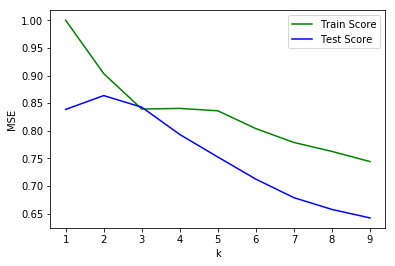

In [468]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

y looking at the graph we can see that k=3 is the best number to use as k.

### K Neighbors Regressor Evaluation
Finding evaluation performance metrics for K Neighbors Regressor using k=3.
In the codes below, we calculated performance metrics once manualy and once using the functions.

In [594]:
knn_reg = KNeighborsRegressor(3) 
knn_reg.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = knn_reg.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 144370.02724505332
Root Mean Square Error = 379.96056011782764
Mean Absolute Error    = 74.88401826484018
Median Absolute Error  = 13.083333333333334
R^2                    = 0.8427018626241676
Adjusted R^2           = 0.8243945755788946


### K Neighbors Regressor Cross Validation

Performing cross validation to find better R squared and other performance metrics with k=3.

In [591]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
knn_reg = KNeighborsRegressor(3) 
knn_reg.fit(X_train, y_train)
knnscores = ms.cross_validate(knn_reg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(knnscores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    0.938        -15649.112      0.938
Fold  2    0.877        -13965.123      0.877
Fold  3    0.903        -12675.283      0.903
Fold  4    0.931        -45212.867      0.932
Fold  5    0.609        -478594.125      0.611
----------------------------------------
Mean       0.852        -113219.302      0.852
Std        0.123        183086.903      0.122


R-squared is a statistical measure of how close the data are to the fitted regression line. To evaluate the overall fit of a KN Regressor model, we use the R-squared value.The threshold for a good R-squared value depends widely on the domain, so we can compare R-square for all the regression models to decide which model better fits the data.

Performing KN regression gives us an R squared of 0.85 which is good in general. However the value of MSE is large.

### K Neighbors Regressor Grid-Search with Cross Validation

In [471]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

#Labels= Labels.reshape(Labels.shape[0],)
import warnings
warnings.filterwarnings("ignore")
knnScoring =  'r2'
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"n_neighbors":[1,2,3,4,5,6,7,8,9]}
## Define the SVM model
knn_clf = KNeighborsRegressor()

## Perform the grid search over the parameters
scoring=knnScoring
clf = ms.GridSearchCV(estimator = knn_clf, param_grid = param_grid, 
                      cv = 5, # Use the inside folds
                      scoring = knnScoring,
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.n_neighbors)
#print(clf.best_estimator_.penalty)

3


As we also observed in the graph above, Best parameter for k is 3 using grid search with cross validation as well.

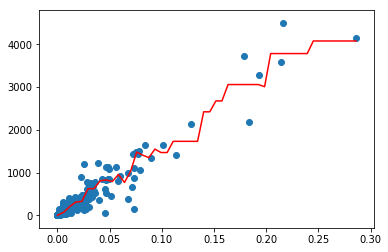

In [477]:
X_b = X_train[:500,76].reshape(-1,1)
y_b = y_train[:500]

knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

the grapg shows the fiiting line and how KN Regressor is going to fit in the data where r squared is 0.852 which is a good fit.

In [ ]:
y_knr_predict = clf.predict(X_test)
y_knr_train_predict = clf.predict(X_train)
report_table=0
report_table1 = [['knr', 'k = 3', clf.score(X_train, y_train), clf.score(X_test, y_test), sklm.r2_score(y_test,y_knr_predict)]]
report = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

## Linear regression using the Normal Equation
Getting test and train scores without performing cross validation.

In [480]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.97377116657691
0.9576693501023822


Text(0.5,0,'RM')

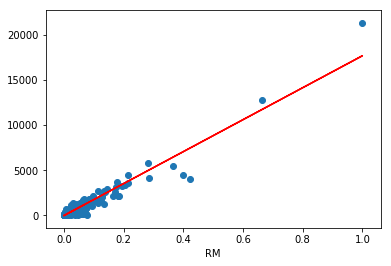

In [481]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,76].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

the grapg shows the fiiting line and how Linear Regressor is going to fit in the data 

In [483]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

The model has been fit to the training data. Now we examine the value of the intercept term and coefficients.

In [484]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 3.49458304e+04 -4.77126605e+03  3.25877692e+04  1.50185725e+05
 -1.21952533e+05  1.36944918e+05 -1.32013552e+05 -2.40344543e+03
  2.43166640e+03  7.48716593e+02  4.25364801e+02 -1.68319852e+03
  1.36691189e+03  9.10077022e+02  5.53270184e+03  8.77435042e+02
 -5.72451531e+03 -5.12162164e+03  4.28759757e+03 -4.38941993e+03
  5.96544489e+03 -1.23515218e+00  3.25720614e+01 -3.76405296e+01
 -5.80507410e+01  2.06637919e+01 -6.22226529e+01  2.29259923e+01
 -4.14298128e+02 -2.36415324e+03 -1.07561288e+03 -7.46554778e+03
  4.46121872e+03 -7.92549589e+03  2.72071302e+04 -4.62059766e+03
 -6.26564264e+02  8.58311264e+03  4.42063148e+03 -3.28926589e+03
  2.96043669e+03 -9.32615531e+03  4.14602458e-01 -4.32076820e+01
  4.15561362e+01  4.77842002e+01 -1.49465697e+01  6.85645587e+01
 -1.27923940e+01 -7.87344850e+01 -3.24813087e+02  2.30342011e+01
  2.19371887e+02 -8.48159590e+01  3.07090202e+01 -3.54132333e+01
 -1.09422642e+03 -1.02028615e+04  1.37958144e+04  7.65149442e+03
 -5.48951960e+03  3.5

### Linear regression Evaluation
We will now use the test dataset to evaluate the performance of the regression model.The code in the cell below compute and display various performance metrics and examine the results. 

In [602]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 38767.20966145528
Root Mean Square Error = 196.89390458177033
Mean Absolute Error    = 53.13818538497423
Median Absolute Error  = 12.538781174793305
R^2                    = 0.9577612473491153
Adjusted R^2           = 0.9528452516347703


The RMSE, MAE and median absolute error are all large. However, the  R2  and  R2adj  are rather different. This model has a large number of parameters compared to the number of cases available. This result indicates that the model may be overfit and might not generalize well.
MSE is less than the MSE of KN regression.

### Linear regression Cross Validation
We are now evaluating the performance metrics with cross validation to see if we are able to get any better results.

In [486]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
lreg = LinearRegression()
lreg.fit(X_train, y_train)
#sgd_reg.fit(X_train, y_train)
#logistic_mod = linear_model.LogisticRegression(C = 1.0, class_weight = {0:0.45, 1:0.55}) 
lregscores = ms.cross_validate(lreg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

In [589]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(lregscores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    0.903        -24537.234      0.903
Fold  2    0.873        -14411.543      0.873
Fold  3    0.868        -17256.637      0.869
Fold  4    0.909        -59346.790      0.909
Fold  5    0.919        -98979.057      0.919
----------------------------------------
Mean       0.895        -42906.252      0.895
Std        0.020        32316.320      0.020


R squared seems more reasonable now and about 0.90, however MSE is still large but still better than KN regressor.

In [ ]:
y_lreg_predict = lreg.predict(X_test)
y_lreg_train_predict = lreg.predict(X_train)
report_table2 = report_table1 + [['Linear reg', '-', lreg.score(X_train, y_train), lreg.score(X_test, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table2,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

## SGD Regressor

In [488]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

-13244149.252873488
-32956219.284245018


The model has been fit to the training and testing data. Now we examine the value of the intercept term and coefficients and itteration and scores.

In [489]:
print(sgd_reg.coef_)
print(sgd_reg.intercept_)
print(sgd_reg.n_iter_)
sgd_reg.score

[ 7.96805256e+06 -1.29053645e+08 -4.92264648e+07 -1.62564631e+07
 -2.66490079e+07  1.79378465e+08  1.01165250e+08  7.94143352e+07
  9.85974662e+07 -5.62764791e+07  6.54819246e+07 -1.03074784e+08
 -7.01081771e+07 -5.06694015e+07 -3.01886952e+08  6.03451725e+06
  4.07763090e+07 -8.76680990e+07  1.32235247e+08  1.80398954e+07
  1.09315899e+08 -2.72373674e+04  4.33429501e+06  4.37104279e+05
  4.98607268e+06  3.75902681e+05  6.74759597e+05 -2.35107322e+05
  2.20781743e+07 -2.35729341e+07 -1.14596302e+07  2.33740281e+07
 -1.16568642e+08  1.82850614e+07 -1.14150337e+08  2.87470259e+08
  5.06545135e+07 -7.45231599e+07  9.34953645e+07 -2.75557880e+07
 -2.17419305e+08 -1.46388843e+07 -3.08806138e+05 -6.27509104e+06
 -1.37215968e+06 -1.58890974e+06 -3.86617687e+05 -1.34597041e+06
  6.39620867e+04  1.87616009e+07  1.84164771e+08 -3.27016478e+06
 -1.40023742e+08  9.47632354e+06  4.57724214e+06  1.05900672e+06
 -5.44500080e+07  1.52008466e+07  1.71988214e+08 -3.44750773e+07
  1.09088971e+08  5.25560

<bound method RegressorMixin.score of SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False)>

### SGD Regressor Evaluation
We will now use the test dataset to evaluate the performance of the SGD model.The code in the cell below compute and display various performance metrics and examine the results. 

In [588]:
sgd_reg = SGDRegressor(random_state= 0, max_iter = 10000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = sgd_reg.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 7535168143255636.0
Root Mean Square Error = 86805346.28267798
Mean Absolute Error    = 29253818.589468785
Median Absolute Error  = 11238218.364404455
R^2                    = -8209930663.735213
Adjusted R^2           = -9165450924.868256


It seems that we can't rely on this model since the value of R squared doesn't seem reasonable manualy.

### SGD Regressor Grid Search with Cross Validation
Performing grid search to find the best parameters for penalty and maximum number of iterations.

In [430]:
#Labels= Labels.reshape(Labels.shape[0],)
import warnings
warnings.filterwarnings("ignore")

sgdScoring =  'r2'
sgd_reg = SGDRegressor(random_state= 0, learning_rate = 'optimal')
sgd_reg.fit(X_train, y_train)

nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"max_iter":[1000,10000], "penalty":['l1','l2']}
## Define the SVM model
sgd_clf = SGDRegressor(random_state=0, learning_rate = 'optimal')

## Perform the grid search over the parameters
scoring=sgdScoring
clf = ms.GridSearchCV(estimator = sgd_clf, param_grid = param_grid, 
                      cv = 5, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.max_iter)
print(clf.best_estimator_.penalty)

10000
l2


Performing Grid search with cross validation, we can see that L2 is a better option for penalty and 10000 is the optimized maximum iteration to use.

### SGD Regressor Cross Validation
We are now evaluating the performance metrics with cross validation to see if we are able to get any better results.

In [491]:
#Labels= Labels.reshape(Labels.shape[0],)

In [587]:
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
sgd_reg = SGDRegressor(random_state= 0, max_iter = 1000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
scores = ms.cross_validate(sgd_reg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(scores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    -27651576877.009        -6964833725782610.000      -27189598200.080
Fold  2    -188283455743.862        -21390729020707192.000      -188281708514.100
Fold  3    -17108770010.633        -2244431342397325.250      -16093641917.217
Fold  4    -3904092147.986        -2552701463197280.000      -3641340677.412
Fold  5    -77934496768.141        -95486492835199264.000      -77881366151.759
----------------------------------------
Mean       -62976478309.526        -25727837677456732.000      -62617531092.114
Std        67478623344.827        35568773129965608.000      67708598976.296


Still R squared doesn't seem to be useful. We can conclude that SGD Regressor doesn't perform well on this data set.

In [ ]:
y_sgdreg_predict = sgd_reg.predict(X_test)
y_sgdreg_train_predict = sgd_reg.predict(X_train)
report_table3 =report_table2 + [['SGD reg', 'max_iter=10000, penalty=L2', sgd_reg.score(X_train, y_train), sgd_reg.score(X_test, y_test), sklm.r2_score(y_test,y_sgdreg_predict)]]
report = pd.DataFrame(report_table3,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

## Polynomial Model

The graph below shows the scatter plot of the train set.

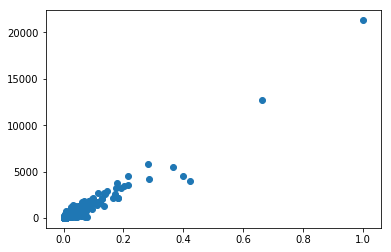

In [493]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,76].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [494]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [495]:
print(train_score_list)
print(test_score_list)

[0.9737711665769102, 0.9999873059349417]
[0.9576693501023645, -619319837619196.1]


Plotting the list of train and test scores.

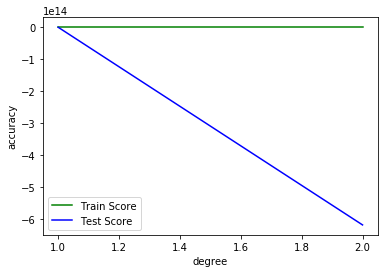

In [496]:
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

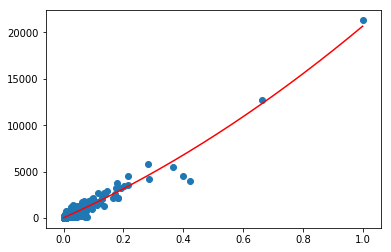

In [497]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,1000).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,76].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

### Polynomial Cross Validation
We are now evaluating the performance metrics with cross validation to see if we are able to get any better results.

In [586]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
polyscores = ms.cross_validate(lreg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(polyscores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    0.903        -24537.234      0.903
Fold  2    0.873        -14411.543      0.873
Fold  3    0.868        -17256.637      0.869
Fold  4    0.909        -59346.790      0.909
Fold  5    0.919        -98979.057      0.919
----------------------------------------
Mean       0.895        -42906.252      0.895
Std        0.020        32316.320      0.020


By Performing cross validation on polynomial model, we get a r squared of 0.89. This r square is better than kn regressor and almost same as Linear regressor. MSE is also better that KN regressor but the same as Linear model.

In [ ]:
report_table4 =report_table3 + [['Polynomial', '-', lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table4,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

## Ridge Model

The graph below shows the result of performing Ridge model using different values of alpah.

In [271]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

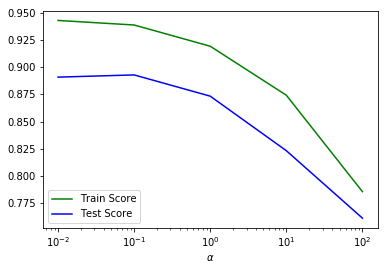

In [272]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

in alpha=0.001, both train and test score are high but as alpha increases, the scores decreases. So we choose alpha as 0.001.

In [130]:
print(train_score_list)
print(test_score_list)

[0.9448647650920345, 0.9445045357451564, 0.9431652195124162, 0.9396473280177601, 0.9221916709250397]
[0.8815022321500411, 0.8832868788777002, 0.8891966354497234, 0.8928853666907681, 0.8789841408509322]


In [268]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9444
Test score: 0.8844


The model has been fit to the training data. Now we examine the value of the intercept term and coefficients.

In [132]:
print(ridge.coef_)
print(ridge.intercept_)

[ 6.24470398e+02  4.67549778e+02 -3.84880132e+02 -7.52901120e+02
  1.13329774e+03  2.08754246e+03 -8.15109459e+02  9.92682451e+01
  9.23507931e+00 -7.52531602e+01  3.94504905e+01 -5.19754965e+01
  4.14641863e+01 -1.31124360e+02  1.22125250e+02 -9.24270263e+00
 -6.64442954e+01  4.12559769e+01  1.06529316e+00  1.79380218e+02
 -3.27248838e+02  2.99071037e+00 -7.69935457e+00 -7.57504090e+00
 -3.81432597e-01  2.18085296e+00 -1.52403625e+01 -2.23839638e+00
 -1.11215062e+02 -1.06303422e+02  4.71830117e+00  1.19721402e+02
 -1.95600335e+02  1.50334553e+02 -1.46782008e+02 -9.11932470e+01
  9.67628803e+01  6.46347727e+01 -8.87107243e+01  7.48771958e+01
 -1.21729922e+02  1.27610277e+02 -2.68587097e+00  9.24189455e+00
  1.04395268e+01  2.69182450e+00 -3.60687259e+00  1.56895839e+01
  8.97533531e-01 -1.85790558e+00 -4.03403128e+00 -1.28699040e+00
 -2.18145272e+00  2.97651747e+00 -1.47820847e-01  1.11021708e+00
 -5.87512744e+01  4.86192947e+01  1.84323155e+02 -8.73167462e+01
  1.23214684e+01 -3.54199

### Ridge Evaluation
We will now use the test dataset to evaluate the performance of the Ridge model.The code in the cell below compute and display various performance metrics and examine the results. 

In [595]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridge = Ridge(alpha = 0.00001)
ridge.fit(X_train,y_train) 

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_ridge = ridge.predict(X_test) 
print_metrics(y_test, y_score_ridge, 77)    

Mean Square Error      = 40912.960730782564
Root Mean Square Error = 202.2695249680054
Mean Absolute Error    = 53.326160867415794
Median Absolute Error  = 12.490780790060075
R^2                    = 0.9554233476276969
Adjusted R^2           = 0.9502352533240291


R squared is 0.95 which can be either a good fit or the result of overfitiing. MSE is smaller than KN regressor but larger than Linear regression and polynomial.

### Ridge Grid Search with Cross Validation
We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results.

In [507]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
#Labels= Labels.reshape(Labels.shape[0],)
ridgeScoring = 'r2'
ridge = Ridge()
ridge.fit(X_train,y_train) 
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
## Define the SVM model
Ridge_clf = Ridge(random_state=0)

## Perform the grid search over the parameters
scoring=ridgeScoring
clf = ms.GridSearchCV(estimator = Ridge_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#best alpha
print(clf.best_estimator_.alpha)

1e-05


By performing grid search on Ridge, the best value of alpha is 0.00001. we use this parameter to do cross validation and get performance metrics again.

In [584]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridge = Ridge(alpha = 0.00001)
ridge.fit(X_train,y_train) 
Ridgescores = ms.cross_validate(ridge, Features, Labels, scoring=scoring,
                        cv=inside, return_train_score=False)


def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(Ridgescores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    0.834        -43525.970      0.835
Fold  2    0.888        -29834.838      0.889
Fold  3    0.945        -29990.564      0.945
Fold  4    0.904        -16025.246      0.904
Fold  5    0.804        -223681.173      0.804
----------------------------------------
Mean       0.875        -68611.558      0.875
Std        0.050        78021.033      0.050


R squared is 0.87 using the best alpha parameter. MSE is larger than Polynomial and Linear.
Now we plot ridge model for all 77 features.

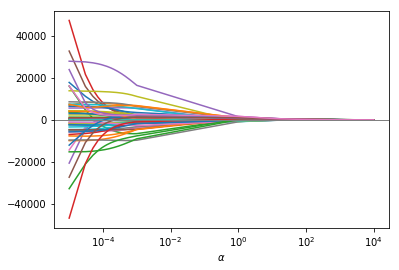

In [511]:
%matplotlib inline

x_range1 = np.linspace(0.00001, 0.001).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
#          ncol=3, fancybox=True, shadow=True)
plt.show()

In [ ]:
y_ridge_predict = ridge.predict(X_test)
y_ridge_train_predict = ridge.predict(X_train)
report_table5 =report_table4 + [['Ridge', 'alpha=0.00001', ridge.score(X_train, y_train), ridge.score(X_test, y_test), sklm.r2_score(y_test, y_score_ridge)]]
report = pd.DataFrame(report_table5,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

## Lasso Model

The graph below shows the result of performing Lasso model using different values of alpah.

In [561]:
from sklearn.linear_model import Lasso
x_range = [0.0001, 0.001, 0.01, 0.1, 1,10]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5,0,'$\\alpha$')

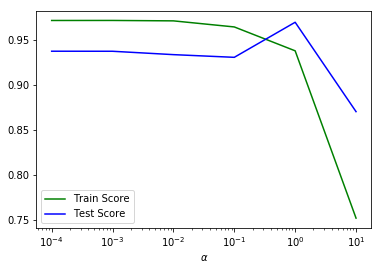

In [562]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

in alpha=0.1, both train and test score are high and close but as alpha increases, the scores decreases. So we choose alpha as 0.001.

### Lasso Model Evaluation
We will now use the test dataset to evaluate the performance of the Lasso model.The code in the cell below compute and display various performance metrics and examine the results. 

In [596]:
lasso = Lasso(alpha=0.005)
lasso.fit(X_train,y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_lasso = lasso.predict(X_test) 
print_metrics(y_test, y_score_lasso, 77)    

Mean Square Error      = 57649.81090796944
Root Mean Square Error = 240.1037502996766
Mean Absolute Error    = 56.273357729298034
Median Absolute Error  = 12.447867722446565
R^2                    = 0.9371877386952335
Adjusted R^2           = 0.929877276430054


R squared is 0.93 and a little less than Ridge model and MSE is higher than all other models except KN regressor.

### Lasso Model Grid Search with Cross Validation

We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results.

In [516]:
#Labels= Labels.reshape(Labels.shape[0],)
import warnings
warnings.filterwarnings("ignore")

lassoScoring =  'r2'
lasso = Lasso()
lasso.fit(X_train,y_train)

nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0,.00001]}
## Define the SVM model
Lasso_clf = Lasso(random_state=0)

## Perform the grid search over the parameters
scoring=lassoScoring
clf = ms.GridSearchCV(estimator = Lasso_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#Best alpha
print(clf.best_estimator_.alpha)


0.005


By performing grid search on lasso, the best value of alpha is 0.005. we use this parameter to do cross validation and get performance metrics again.

### Lasso Model Cross Validation

In [580]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
lasso = Lasso(alpha=0.005)
lasso.fit(X_train,y_train)
lassoscores = ms.cross_validate(lasso, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(lassoscores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    0.910        -22699.514      0.910
Fold  2    0.891        -12433.329      0.891
Fold  3    0.876        -16246.554      0.876
Fold  4    0.905        -62142.776      0.905
Fold  5    0.868        -161535.893      0.869
----------------------------------------
Mean       0.890        -55011.613      0.890
Std        0.016        56139.091      0.016


R squared is 0.89 using the best alpha parameter. This is less than polynomial and ridge model but higher than KN model. It's about the same as Linear model. MSE is larger than Polynomial and Linear but less than ridge.
Now we plot Lasso model for all 77 features.

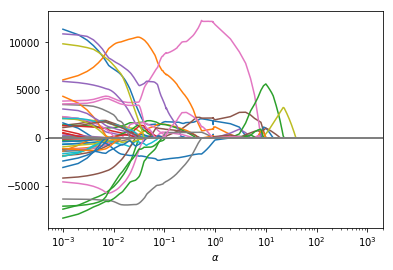

In [523]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=99999, linewidth=2, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
#plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.5),
 #        ncol=3, fancybox=True, shadow=True)
plt.show()

In [ ]:
y_lasso_predict = lasso.predict(X_test)
y_lasso_train_predict = lasso.predict(X_train)
report_table6 =report_table5 + [['Lasso', 'alpha=0.005', lasso.score(X_train, y_train), lasso.score(X_test, y_test), sklm.r2_score(y_test, y_score_lasso)]]
report = pd.DataFrame(report_table6,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

## Linear SVM Model

In [574]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, random_state=0)
lin_SVR = LinearSVR(random_state=0, tol=0.005, C=1000, epsilon=0.01)
lin_SVR.fit(X_train, y_train)

LinearSVR(C=1000, dual=True, epsilon=0.01, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.005, verbose=0)

In [575]:
print(lin_SVR.coef_)
print(lin_SVR.intercept_)

[ 4.43099923e+02  5.68698791e+02  4.54287283e+02  5.28937345e+02
  3.73046995e+02  8.43198295e+02  1.24141650e+03 -9.13327500e+01
  2.33165122e+02  2.54088485e+02  9.47767363e+01  1.09111336e+02
  6.16357432e+02  5.77545873e+02  6.64042685e+02 -3.92509055e+01
 -4.03447964e+01 -1.99439184e+02 -1.81594553e+02 -7.14251709e+02
 -3.37992805e+02 -3.02793737e+00  3.93201674e+01  9.73100321e+00
  3.39505422e+00 -1.62647814e+00  6.45451868e-01 -2.15376802e+00
  2.10114000e+02  2.51618667e+02  1.62504622e+02  1.63375705e+02
  4.86587245e+01  4.99042523e+02  1.06462869e+03  7.95845875e+02
  2.50436899e+02  2.43026067e+02  8.75354679e+01 -2.04191644e+02
 -3.53173404e+02  2.86434036e+02  1.53483520e+00 -4.08702530e+01
 -7.62798936e+00 -7.27343660e+00  2.67450388e+00  2.65950589e-01
  4.63225012e+00 -1.20856434e+01  3.18636775e+01 -2.43854207e+01
  8.07363844e+00  1.35783205e+01 -4.93315444e-01 -1.80575492e+01
 -1.81533779e+02 -2.04056023e+02 -4.50931571e+01 -1.95416387e+02
 -1.76369833e+02  4.01281

### Linear SVM Model Evaluation
We will now use the test dataset to evaluate the performance of the Linear SVM model.The code in the cell below compute and display various performance metrics and examine the results. 

In [597]:
lin_SVR = LinearSVR(tol=0.005)
lin_SVR.fit(X_train, y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_linsvm = lin_SVR.predict(X_test) 
print_metrics(y_test, y_score_linsvm, 77)    

Mean Square Error      = 659703.3234493752
Root Mean Square Error = 812.2212281450019
Mean Absolute Error    = 174.17863793207607
Median Absolute Error  = 20.718657267433493
R^2                    = 0.28122127577704237
Adjusted R^2           = 0.1975655590221499


R squared it's not good. Also we have a very large MSE value which indicates it's not a good model. Now we try to find performance metrics using cross validation.

### Linear SVM Model Grid Search with Cross Validation

We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results.

In [573]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid  = {"C": [ 10, 100, 1000], 'epsilon':[0.01,0.1,1,10]}
## Define the SVM model
svc_clf = LinearSVR(random_state=0, tol=0.005)

## Perform the grid search over the parameters
scoring=LinearSVR.score
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#best c and epsilon parameters
print(clf.best_estimator_.C)
print(clf.best_estimator_.epsilon)

1000
0.01


Best parameters for C and gamma which are 2 hyperparameters of Linear SVM are 1000 and 0.01 respectively.

### Linear SVM Model Cross Validation

Using the optimized hyper parameters to get the performance metrics again using cross validation.

In [581]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
lin_SVR = LinearSVR()
lin_SVR.fit(X_train, y_train)
SVRscores = ms.cross_validate(lin_SVR, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(SVRscores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    0.207        -199631.025      0.287
Fold  2    0.165        -94838.530      0.260
Fold  3    0.197        -105385.573      0.265
Fold  4    0.149        -556640.734      0.203
Fold  5    0.088        -1117416.759      0.119
----------------------------------------
Mean       0.161        -414782.524      0.227
Std        0.042        389409.661      0.061


R squared and MSE are still not acceptable.

In [ ]:
y_linearsvm_predict = clf.predict(X_test)
y_linearsvm_train_predict = clf.predict(X_train)
report_table7 =report_table6 + [['Linear SVM', 'C=1000, gamma=0.01', clf.score(X_train, y_train), clf.score(X_test, y_test), sklm.r2_score(y_test, y_score_linsvm)]]
report = pd.DataFrame(report_table7,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

## SVM Model with kernel

In [542]:
nr.seed(1115)
ker_SVR = SVR(C=1000, gamma=0.02, epsilon=10, kernel='rbf')
ker_SVR.fit(X_train, y_train) 


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=10, gamma=0.02,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### SVM Model with kernel Evaluation
We will now use the test dataset to evaluate the performance of the kernelized SVM model.The code in the cell below compute and display various performance metrics and examine the results. 

In [598]:
ker_SVR = SVR(C=1000, gamma=0.02, epsilon=10, kernel='rbf')
ker_SVR.fit(X_train, y_train) 
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score_kersvm = ker_SVR.predict(X_test) 
print_metrics(y_test, y_score_kersvm, 77)    

Mean Square Error      = 572639.703951848
Root Mean Square Error = 756.7296108596835
Mean Absolute Error    = 87.29573484268354
Median Absolute Error  = 9.18478744495269
R^2                    = 0.3760813062244529
Adjusted R^2           = 0.3034659605476664


R squared is better than Linear SVM but still not good. MSE is very large. Now we try to find performance metrics using cross validation.

### Kernel SVM Model Grid Search with Cross Validation

We are now evaluating the performance metrics with grid search with cross validation to see if we are able to get any better results. We have 3 parameters to optimize: C, gamma and epsilon.

In [541]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [1, 10, 100, 1000], "gamma":[1.0/50.0, 1.0/200.0, 1.0/500.0, 1.0/1000.0], 'epsilon':[0.01,0.1,1,10]}
## Define the SVM model
svc_clf = SVR(kernel='rbf') 

## Perform the grid search over the parameters
scoring=SVR.score
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#best parameters for C, gamma and epsilon
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)
print(clf.best_estimator_.epsilon)


1000
0.02
10


Best parameters for C, gamma and epsilon are 1000, 0.02 and 10 respectively.

### SVM Model with kernel Cross Validation

Using the optimized hyper parameters to get the performance metrics again using cross validation.

In [582]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ker_SVR = SVR(C=1000, gamma=0.02, epsilon=10, kernel='rbf')
ker_SVR.fit(X_train, y_train)
kerSVRscores = ms.cross_validate(ker_SVR, Features, Labels, scoring=scoring,
                        cv=inside, return_train_score=False)

def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('    R_Squared   Mean_Squared_Error    Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(kerSVRscores)    

    R_Squared   Mean_Squared_Error    Explained_Varianc
Fold  1    0.500        -620218.347      0.503
Fold  2    0.739        -136842.491      0.740
Fold  3    0.899        -25400.261      0.899
Fold  4    0.868        -23047.256      0.869
Fold  5    0.915        -16288.200      0.917
----------------------------------------
Mean       0.784        -164359.311      0.786
Std        0.155        232279.316      0.154


R squared improved a lot but it's still less than all other models except Linear SVC. MSE is still larger than Ridge, Lasso, polynomial and linear regression.

In [ ]:
y_linearsvm_predict = clf.predict(X_test)
y_linearsvm_train_predict = clf.predict(X_train)
report_table8 =report_table7 + [['Kernel SVM', 'C=1000, gamma=0.02, epsilon=10', clf.score(X_train, y_train), clf.score(X_test, y_test), sklm.r2_score(y_test, y_score_kersvm)]]
report = pd.DataFrame(report_table8,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

# Conclusion: Selection of the best model

### Best Model:Linear Regression Model and Ridge Model
We concluded that Ridge and Linear Regression models, with respectively 0.87 and 0.89 of r squared, performs better than other regression models on this data set. We now perform them again with their best parameters to find their performance metrics.

### Running the best model on the whole data set.

##### Linear Regression

In [600]:
X1_train_org,X1_test_org,y1_train,y1_test=train_test_split(X1,y1,random_state=18)
X1_train=scaler.fit_transform(X1_train_org)
X1_test=scaler.transform(X1_test_org)

In [603]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X1_train, y1_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X1_test) 
print_metrics(y1_test, y_score, 77)    

Mean Square Error      = 20865.63581198221
Root Mean Square Error = 144.44942302405437
Mean Absolute Error    = 46.54184535562723
Median Absolute Error  = 8.574979190442384
R^2                    = 0.9468972981900919
Adjusted R^2           = 0.946869605613532


##### Ridge

In [ ]:
y_lreg_predict = lreg.predict(X_test)
y_lreg_train_predict = lreg.predict(X_train)
report_whole_lreg = [['Linear reg', '-', lreg.score(X_train, y_train), lreg.score(X_test, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_whole_lreg,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

In [604]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridge = Ridge(alpha = 0.00001)
ridge.fit(X1_train,y1_train) 

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ridge.predict(X1_test) 
print_metrics(y1_test, y_score, 77)    

Mean Square Error      = 20868.810671340805
Root Mean Square Error = 144.46041212505523
Mean Absolute Error    = 46.52737293427725
Median Absolute Error  = 8.543534823413978
R^2                    = 0.9468892182249604
Adjusted R^2           = 0.946861521434772


In [ ]:
y_ridge_predict = ridge.predict(X_test)
y_ridge_train_predict = ridge.predict(X_train)
report_whole_ridge =report_table4 + [['Ridge', 'alpha=0.00001', ridge.score(X_train, y_train), ridge.score(X_test, y_test), sklm.r2_score(y_test, y_score)]]
report = pd.DataFrame(report_whole_ridge,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

R squared and MSE using these two models are so close to eachother and about 0.9468 and 20868 respectively. We concluded that Ridge and Linear Regression models, with respectively 0.87 and 0.89 of r squared, performs better than other regression models on this data set. 